In [415]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

$\textbf{Part 1}$

The normal distribution, described by the probability density function ${f(x)={\cfrac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\cfrac {1}{2}} \Big( {\cfrac {x-\mu }{\sigma }}\Big)^{2}}}$, is a continuous, monovariate probability distribution. $\mu$ is the mean/expectation value of the distribution, $\sigma$ represents the standard deviation of the function, and the variance is given by $\sigma ^2$. The normal distribution is often used as a way to analyze and describe how spread out numbers are from each other. The 'standard' normal distribution is given by taking $\sigma ^2 = 1$, and $\mu = 0$. Below is an example of a normal distribution with $\mu = 1$ and $\sigma = 3.5$.

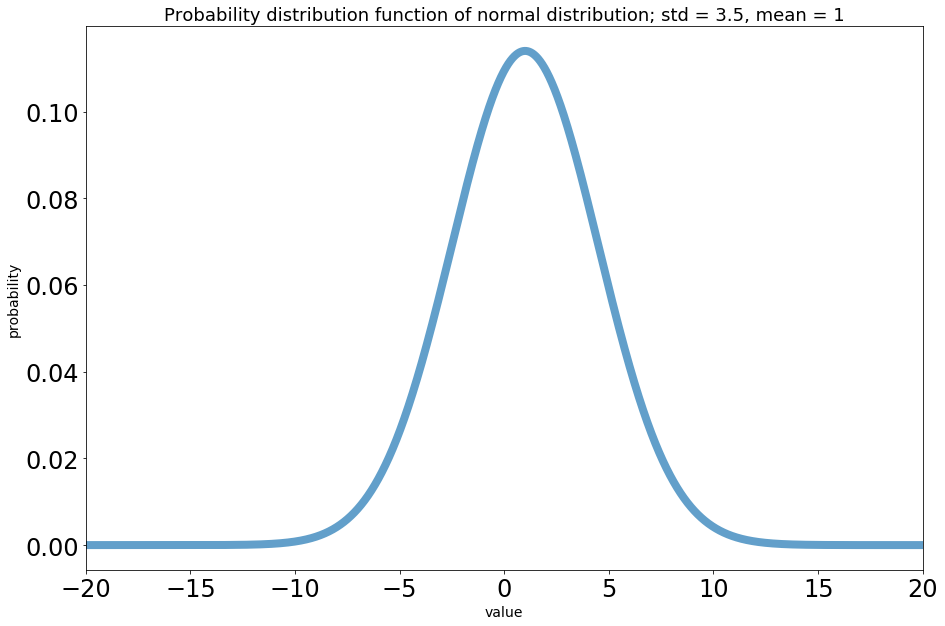

In [416]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([-20,20])
x = np.linspace(-20,20,10000)
ax.plot(x,stats.norm.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Probability distribution function of normal distribution; std = 3.5, mean = 1',fontsize=18)
plt.show()

The cumulative distribution function is used to represent the probability that any value will be less than or equal to a chosen x. This is often done by integrating a probability density from negative infinity to the aforementioned chosen value of x. Below is a graph of the cumulative distribution function of the normal distribution function shown directly above, with the same parameters. In this case, since it is a cumulative function of the normal distribution, it can be simply written as ${\displaystyle F(x)=\Phi \left({\frac {x-\mu }{\sigma }}\right)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right]}$, where ${\displaystyle \Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]}$


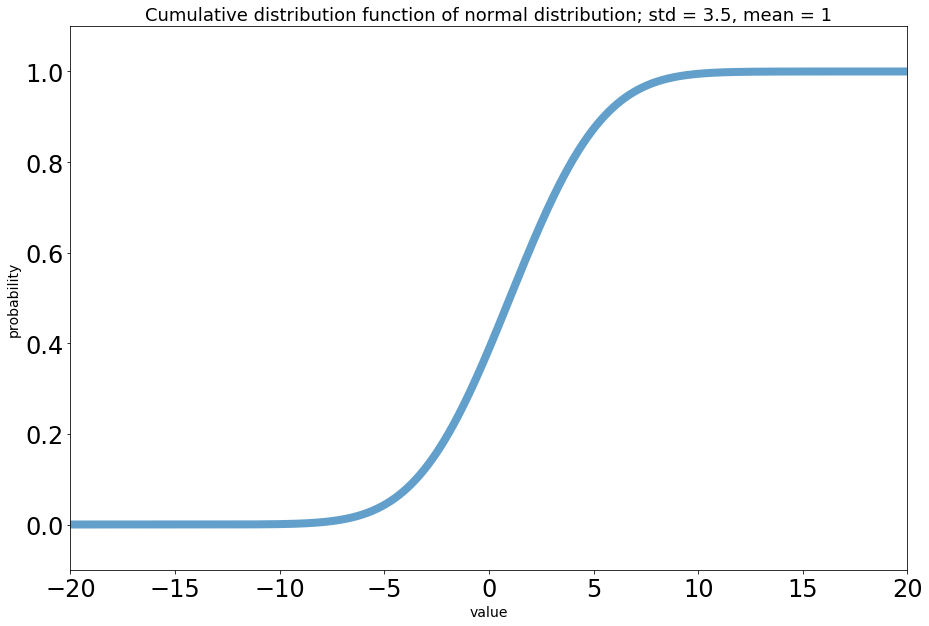

In [383]:
fig, ax = plt.subplots(1, 1)
#ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-20,20])
plt.ylim([-0.1,1.1])
x = np.linspace(-20,20,10000)
ax.plot(x,stats.norm.cdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Cumulative distribution function of normal distribution; std = 3.5, mean = 1',fontsize=18)
plt.show()

For the cumulative distribution function of the normal distribution, there are resources known as 'z-tables' to make approximating probabilities and sigma values much easier. Using the cumulative table found at https://en.wikipedia.org/wiki/Standard_normal_table as a reference, it is evident that for a value of z that is 2 higher than the mean, the probability of a number being less than that z is 0.97725. Below, that approximation will be checked, and an associated sigma value will be found. Sigma values can be extremely useful in statistics. A sigma value is the probability that a given value in a normal distribution with $\sigma = 1$ and $\mu = 0$ will be, at most, up to that sigma value.

In [384]:
#Subtract the mean and divide by the standard deviation
#To get z in terms of sigma
y = stats.norm.cdf(7+1,loc=1,scale=3.5)
print("The probability of a number having value less than or equal to 7 for the above cumulative distribution function is " + str(y)) 
z = stats.norm.ppf(0.97724986, loc=1,scale=3.5)
sigma = (z - 1)/(3.5)
print("The sigma associated with the probability above is " + str(sigma) + ". Since the chosen number was 7, which cooresponds to 2 multiplied \nby the standard deviation, a sigma value of 2 is expected.")

The probability of a number having value less than or equal to 7 for the above cumulative distribution function is 0.9772498680518208
The sigma associated with the probability above is 1.999999850867282. Since the chosen number was 7, which cooresponds to 2 multiplied 
by the standard deviation, a sigma value of 2 is expected.


$\textbf{Part 2}$

The exponential probability density function is described by the equation $ f(x;\lambda) = \begin{cases}\lambda e^{-\lambda x} & x \ge 0, \\0 & x < 0.\end{cases}$, where $\lambda > 0$ is the parameter of the distribution. An exponential distribution is characterized primarily by its memorylessness (which will be expanded upon below), and its exponential shape. For an 
exponential distribution, the mean is equal to the standard deviation i.e. $\mu = \sigma = \cfrac{1}{\lambda}$. In the following image, both an analytic and histogram realization 
of an exponential distribution will be overlayed. The distribution is normalized to start at x = 1, and has a standard deviation of 3.5.

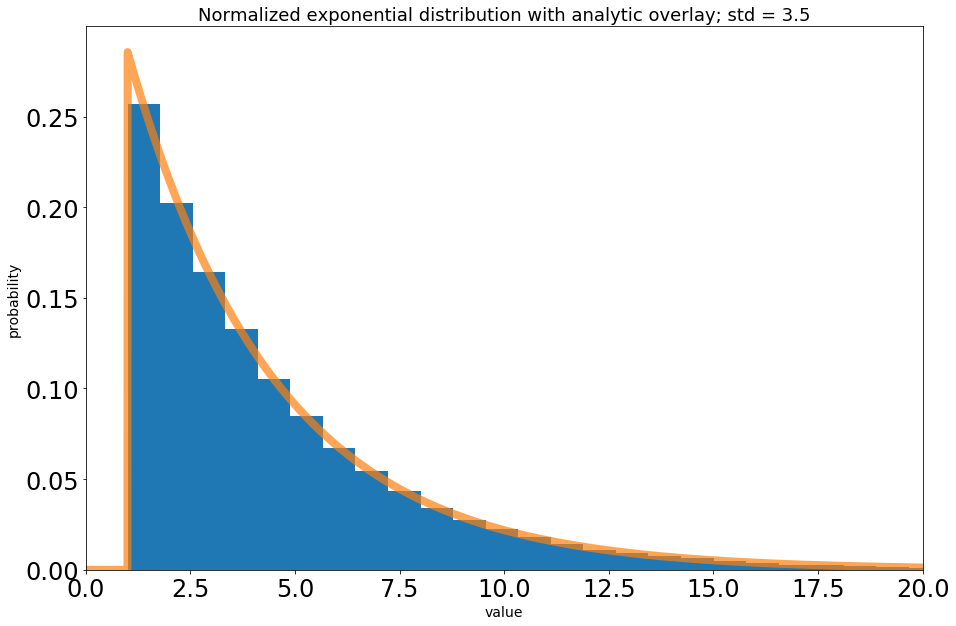

In [385]:
y = stats.expon.rvs(loc=1, scale=3.5, size=100000)
fig, ax = plt.subplots(1, 1)
ax.hist(y, 50, density=True, histtype='stepfilled')
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(-20,20,10000)
ax.plot(x, stats.expon.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Normalized exponential distribution with analytic overlay; std = 3.5',fontsize=18)
plt.show()

Below, a log scale plot of the exponential density function is given, to provide more clarity to the edge cases with much smaller sample sizes. 

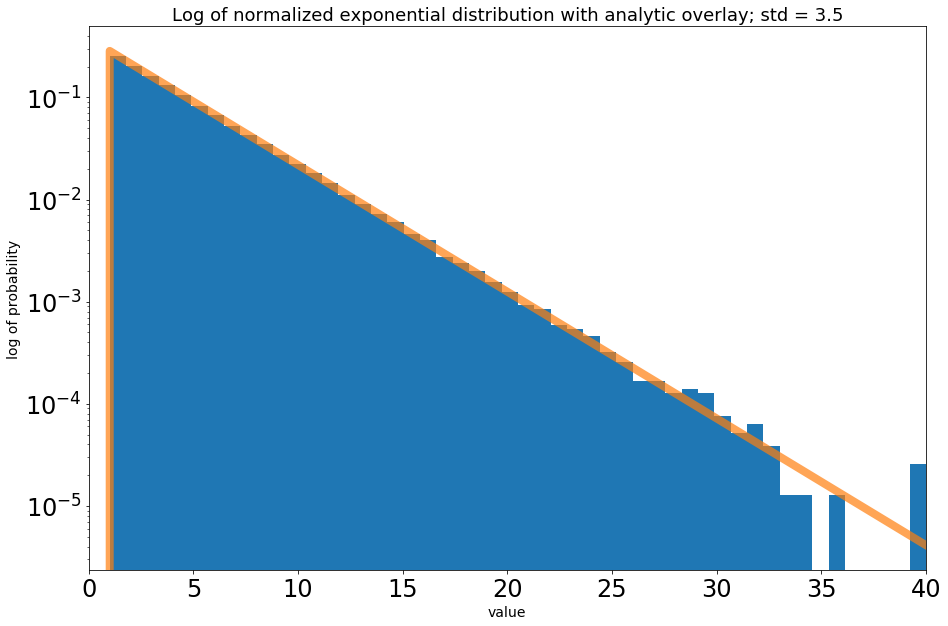

In [386]:
y = stats.expon.rvs(loc=1, scale=3.5, size=100000)
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(y, 50, density=True, histtype='stepfilled')
plt.tick_params(labelsize = 24)
plt.xlim([0,40])
x = np.linspace(0,40,10000)
ax.plot(x, stats.expon.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
ax.set_ylabel('log of probability', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Log of normalized exponential distribution with analytic overlay; std = 3.5',fontsize=18)
plt.show()

The following image demonstrates the geometric interpretation of the memorylessness property of the exponential probability distribution function. Consider an initial exponential probability density function, which starts at height $\lambda$ and decreases according to $\lambda e^{-\lambda x}$. Some time 'x' later, take the remaining lifetime of the probability density function and rescale/normalize it so that its integrated probability density is equal to one. Now, if you simply shift the new curve x units back to the left, it is clear that the new, rescaled function is identical to the remainder of the original probability density function. It is in this way that the memoryless property of the exponential distribution is geometrically demonstrated - The distribution of the remaining function is the same as the remaining portion of the original unconditional distribution.  

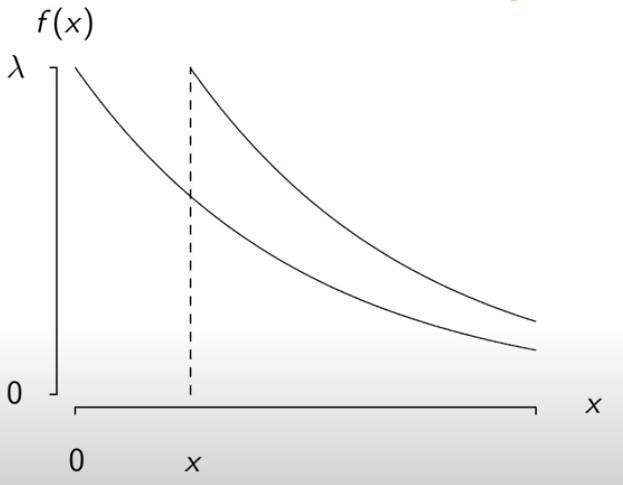

In [387]:
from IPython.display import Image
Image(filename='Capture2.PNG')

$\textbf{Part 3 & 4}$ 

Suppose we have measured a data point of value 5 after measuring background, signal-free data that fits an exponential probability distribution. What is \
the probability that we would observe this value of 5 (or more extreme measurements), and its associated sigma value? By performing a fairly straightforward \
calculation using the integral of the nonzero portion of the exponential probability distribution up to the our chosen value of 5, utilizing the aforementioned \
equation$ f(x;\lambda) = \begin{cases}\lambda e^{-\lambda x} & x \ge 0, \\0 & x < 0.
\end{cases}$, we can produce the probability that we would measure this value or greater from the background. In this case, the probability \
of finding a value equal to or more extreme than our data point is simply 1 minus the integral of the exponential probability function from zero up to our value. \
Since $f(x;\lambda) = 0$ when $x < 0;$ This can be written as $1 - \int_{- \infty}^{x} \lambda e^{-\lambda x} dx= 1 - \int_{0}^{x} \lambda e^{-\lambda x}dx.$ For this exercise's sake, let's say the hypothetical \
data is normalized to start at x = 1 and a standard deviation of 3.5, as similarly modeled in Part 1 and Part 2. Since it is normalized to start at 1 rather than 0, \
the function must be shifted by one. So, our integrated function must be horizontally shifted to the right by one, leaving our final integral as $1 - \int_{1}^{5} \lambda e^{-\lambda (x - 1)}dx$ \
The probability of finding a data point of 5, or more extreme, where $\mu = 3.5 = \sigma = \cfrac{1}{\lambda} \rightarrow \lambda = \cfrac{1}{3.5}$, is therefore equivalent to \
$1 - \int_{1}^{5} \lambda e^{-\lambda (x-1)}dx = 1 - \int_{1}^{5} \cfrac{1}{3.5} e^{-\cfrac{1}{3.5} (x-1)}dx = 1 - \Bigg(\mathrm{e}^{-\frac{571428596}{500000021}}\left(\mathrm{e}^\frac{571428596}{500000021}-1\right)\Bigg) = 1 - 0.6810934430404942 = 0.318906557$ 

In [414]:
std = 3.5
mean = stats.expon.mean(loc = 1, scale = std)
x = 1 - stats.expon.cdf(5, loc = 1, scale = std)
print("The probability of finding a point with value 5 (or more extreme) is " + str(x))

The probability of finding a point with value 5 (or more extreme) is 0.31890655732397044


The associated sigma value of such a measurement can also be calculated by the following.

The above probability, found utilizing the stats.expon package, is therefore shown to be consistent with the previously mentioned integral $1 - \int_{1}^{5} \cfrac{1}{3.5} e^{-\cfrac{1}{3.5} (x-1)}dx = 0.318906557$

In [389]:
z = stats.expon.ppf(1 - x, loc = 1, scale = std)
sigma =  ((z - mean)/(std))
print("The sigma value associated with a measurement of 5 is " + str(sigma))

The sigma value associated with a measurement of 5 is 0.14285714285714285


In [390]:
x1 = 1 - stats.expon.cdf(-3.5 + mean, loc = 1, scale = std)
x2 = 1 - stats.expon.cdf(-2.5 + mean, loc = 1, scale = std)
x3 = 1 - stats.expon.cdf(-1.5 + mean, loc = 1, scale = std)
z1 = stats.expon.ppf(1 - x1, loc = 1, scale = std)
z2 = stats.expon.ppf(1 - x2, loc = 1, scale = std)
z3 = stats.expon.ppf(1 - x3, loc = 1, scale = std)
sigma1 = (z1 - mean)/(std)
sigma2 = (z2 - mean)/(std)
sigma3 = (z3 - mean)/(std)
print("Probabilities x1, x2, x3: " + str(x1) + ", " + str(x2) + ", " + str(x3))
print("Increasing data point chosen by one leads to a probability decrease of " + str(x1 - x2))
print("Increasing data point chosen by one again leads to a probability decrease of " + str(x2 - x3))
print()
print(sigma1 , sigma2, sigma3, sep=', ')
print("Increasing data point chosen by one leads to a sigma increase of " + str(sigma2 - sigma1))
print("Increasing data point chosen by one again leads to a sigma increase of " + str(sigma3 - sigma2))

Probabilities x1, x2, x3: 1.0, 0.751477293075286, 0.5647181220077593
Increasing data point chosen by one leads to a probability decrease of 0.248522706924714
Increasing data point chosen by one again leads to a probability decrease of 0.1867591710675267

-1.0, -0.7142857142857143, -0.4285714285714287
Increasing data point chosen by one leads to a sigma increase of 0.2857142857142857
Increasing data point chosen by one again leads to a sigma increase of 0.2857142857142856


In [391]:
x1 = 1 - stats.expon.cdf(0 + mean, loc = 1, scale = std)
x2 = 1 - stats.expon.cdf(1 + mean, loc = 1, scale = std)
x3 = 1 - stats.expon.cdf(2 + mean, loc = 1, scale = std)
z1 = stats.expon.ppf(1 - x1, loc = 1, scale = std)
z2 = stats.expon.ppf(1 - x2, loc = 1, scale = std)
z3 = stats.expon.ppf(1 - x3, loc = 1, scale = std)
sigma1 = (z1 - mean)/(std)
sigma2 = (z2 - mean)/(std)
sigma3 = (z3 - mean)/(std)
print(x1, x2, x3, sep=', ')
print("Increasing data point chosen by one leads to a probability decrease of " + str(x1 - x2))
print("Increasing data point chosen by one again leads to a probability decrease of " + str(x2 - x3))
print()
print(sigma1 , sigma2, sigma3, sep=', ')
print("Decreasing data point chosen by one leads to a sigma increase of " + str(sigma2-sigma1))
print("Decreasing data point chosen by one again leads to a sigma increase of " + str(sigma3 - sigma2))

0.36787944117144233, 0.27645304662956427, 0.20774818714360088
Increasing data point chosen by one leads to a probability decrease of 0.09142639454187806
Increasing data point chosen by one again leads to a probability decrease of 0.06870485948596339

0.0, 0.285714285714286, 0.5714285714285712
Decreasing data point chosen by one leads to a sigma increase of 0.285714285714286
Decreasing data point chosen by one again leads to a sigma increase of 0.2857142857142852


As expected for an exponential probability distribution, the probability of finding a specific value or higher decreases rapidly at first, but then diminishes less \
and less as the chosen point moves away from the normalized location of the exponential probability distribution. (In this case, the first nonzero location of \
our probability density function = 1 = mean - std = mean - 3.5) As also shown above, the rate of change of the sigma value is constant for values higher and \
lower than the mean of the exponential probability distribution. Finally, the above information also confirms that the sigma value at the mean is 0.0, which \
is to be expected.

$\textbf{Part 5}$ 

The binomial distribution is given by the probability function ${\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$, where ${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$ is the binomial coefficcient, also known as the $x^k$ term in the polynomial expansion of the binomial power $(1+x)^n$. The cumulative distribution function of the binomial distribution is given by ${\displaystyle F(k;n,p)=\Pr(X\leq k)=\sum _{i=0}^{\lfloor k\rfloor }{n \choose i}p^{i}(1-p)^{n-i},}$, where $\lfloor k\rfloor$ is the greatest integer less than or equal to k.

The following plot depicts a normal binomial distribution, with $n = 6$ and $p = 0.5$. For a given binomial distribution, if $p = \cfrac{1}{2}$ or n is sufficienty large, it will appear symmetric about the most frequent value. Following this graph is a binomial distribution that does not abide by these parameters, and is consequently asymmetric.

Text(0.5, 1.0, 'Symmetric binomial distribution with n=6, p=0.5')

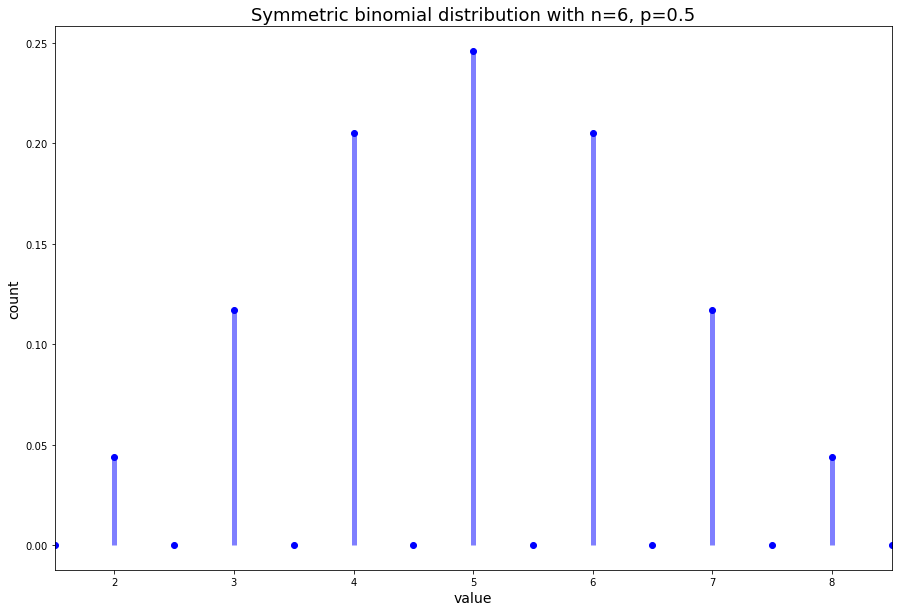

In [392]:
fig, ax = plt.subplots(1, 1)
n, p = 10, 0.5
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p), 0.5)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', lw=1)
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlim(1.5,8.5)
ax.set_ylabel('count', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Symmetric binomial distribution with n=6, p=0.5',fontsize=18)

Text(0.5, 1.0, 'Asymmetric binomial distribution with n=6, p=0.4')

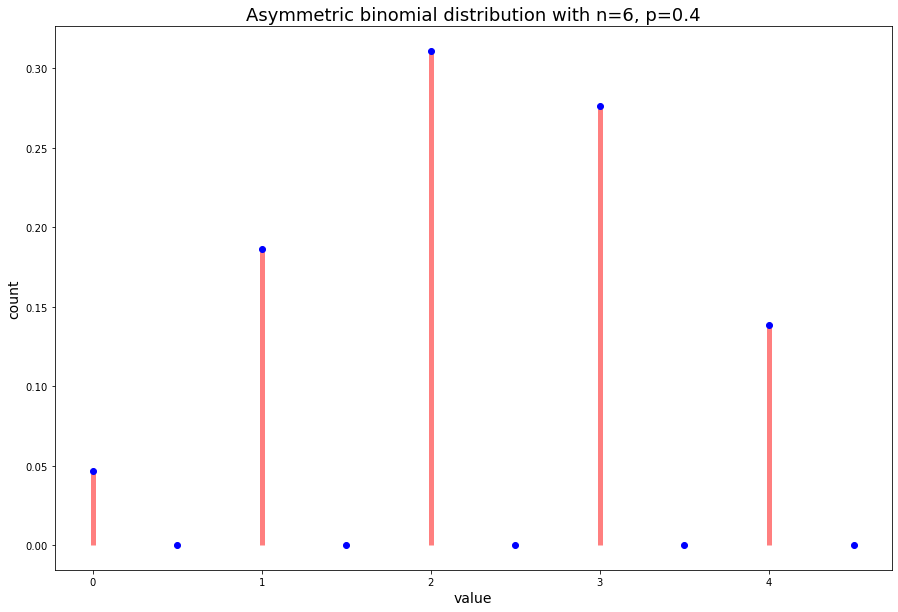

In [393]:
fig, ax = plt.subplots(1, 1)
n, p = 6, 0.4
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p), 0.5)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', lw=1)
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
ax.set_ylabel('count', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Asymmetric binomial distribution with n=6, p=0.4',fontsize=18)

Suppose we have a simple photon detector to count the number of x-ray photons detected when pointed towards a distant star. If the detector takes a count measurement at a fixed rate with an mean photon detection of 10, what is the probability of detecting up to 7 photons? What is the sigma value associated with that probability?

Luckily, the data happens to typically match a standard binomial distribution with n = 20, and p = 0.5. As before, a call to the cumulative distribution function should result in a probability, that can then be converted directly to an associated sigma. Since it is a discrete function, a simple summation of the probabilities up to the desired count suffices for this purpose.

In [409]:
n = 20
p = 0.5
mean = stats.binom.mean(n, p)
print("The mean photon detection value of the data with n = 20 and p = 0.5 is " + str(mean))
x = stats.binom.cdf(7, n, p)
print("The probability of detecting up to 7 photons is " + str(x))
z = stats.binom.ppf(1 - x, n, p)
sigma = (z - mean)/(np.sqrt(n * p * (1 - p)))
print("The associated sigma value is " + str(sigma))

The mean photon detection value of the data with n = 20 and p = 0.5 is 10.0
The probability of detecting up to 7 photons is 0.13158798217773435
The associated sigma value is 0.8944271909999159


The following graph depicts a potential complication of working with a discrete dataset. When there are not enough values in the dataset, it can be nigh impossible to predict the anticipated shape of the distribution. This further complicates approximations for most multi-parameter distributions.

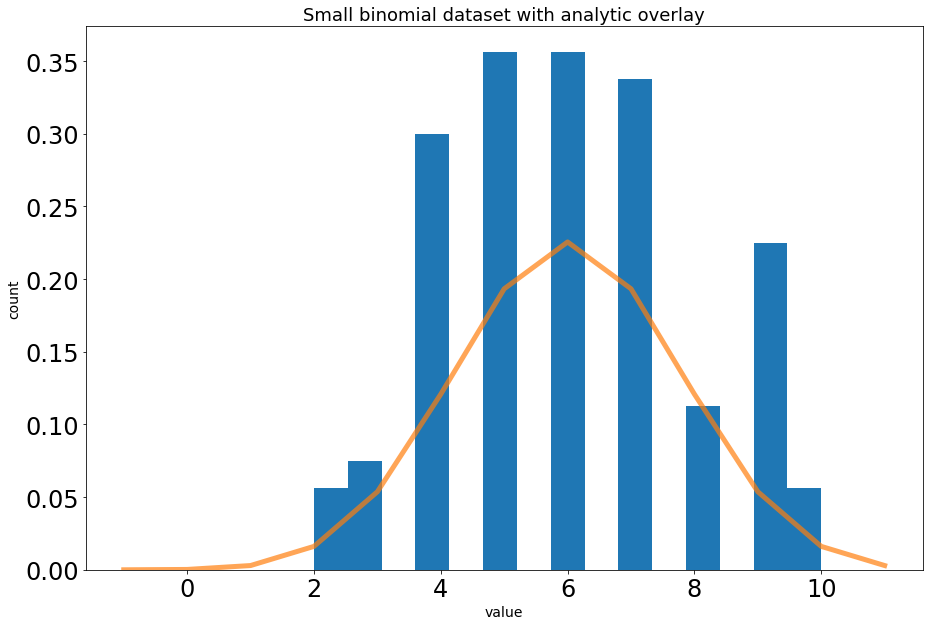

In [413]:
n, p = 12, 0.5
y = stats.binom.rvs(n, p, size=100)
fig, ax = plt.subplots(1, 1)
ax.hist(y, 15, density=True, histtype='stepfilled')
plt.tick_params(labelsize = 24)
x = np.arange(binom.ppf(0, n, p),
              binom.ppf(1, n, p))
ax.plot(x, stats.binom.pmf(x,n,p),linewidth = 5,alpha = 0.7)
ax.set_ylabel('count', fontsize=14)
ax.set_xlabel('value', fontsize=14)
ax.set_title('Small binomial dataset with analytic overlay',fontsize=18)
plt.show()

In the binomial distribution, the values are discrete, but distribution parameters are not required to also be discrete. This potentially confusing property can be explained by simply thinking of any median, or other parameter of a discrete data set. If you have a set of discrete values 1, 1, 1, 2, the mean accompanying this set of numbers will not be discrete. So, while some parameters in a discrete data set can sometimes end up appearing discrete, they can really vary continuously. 